### ⭐ PHASE 7 — Exploratory Data Analysis (Dataset 2: FINAL_USO.csv)
#### 7.1 — Import Libraries & Load Dataset

In [1]:
import os
# os.chdir("C:/Users/brahm/Desktop/GOLD-PRICE-LTV-ANALYSIS") # Hardcoded path removed
# Ensure we are in the project root if running from Notebooks dir
if os.getcwd().endswith("Notebooks"):
    os.chdir("..")
print("Current Working Directory:", os.getcwd())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
import json
import tempfile

import xgboost as xgb
from xgboost import XGBRegressor

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader


from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Current Working Directory: c:\Users\brahm\Desktop\gold-price-ltv-analysis


c:\Users\brahm\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1500)
sns.set_style("whitegrid")

# Load Dataset 2
path = "Dataset/dataset_2/FINAL_USO.csv"
df = pd.read_csv(path, low_memory=False)

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()

Dataset Loaded Successfully!
Shape: (1718, 81)


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


#### 🔹 7.2 — Check Basic Information

In [3]:
# Basic dataset information
print("Column Types:")
display(df.dtypes)

print("\nMissing Values (Top 20):")
missing = df.isna().sum().sort_values(ascending=False)
display(missing.head(20))

print("\nStatistical Summary:")
df.describe().T


Column Types:


Date              object
Open             float64
High             float64
Low              float64
Close            float64
                  ...   
USO_High         float64
USO_Low          float64
USO_Close        float64
USO_Adj Close    float64
USO_Volume         int64
Length: 81, dtype: object


Missing Values (Top 20):


Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
SP_open       0
SP_high       0
SP_low        0
SP_close      0
SP_Ajclose    0
SP_volume     0
DJ_open       0
DJ_high       0
DJ_low        0
DJ_close      0
DJ_Ajclose    0
DJ_volume     0
EG_open       0
dtype: int64


Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Open,1718.0,1.273234e+02,1.752699e+01,1.009200e+02,1.162200e+02,1.219150e+02,1.284275e+02,1.732000e+02
High,1718.0,1.278542e+02,1.763119e+01,1.009900e+02,1.165400e+02,1.223250e+02,1.290875e+02,1.740700e+02
Low,1718.0,1.267777e+02,1.739651e+01,1.002300e+02,1.157400e+02,1.213700e+02,1.278400e+02,1.729200e+02
Close,1718.0,1.273195e+02,1.753627e+01,1.005000e+02,1.160525e+02,1.217950e+02,1.284700e+02,1.736100e+02
Adj Close,1718.0,1.273195e+02,1.753627e+01,1.005000e+02,1.160525e+02,1.217950e+02,1.284700e+02,1.736100e+02
...,...,...,...,...,...,...,...,...
USO_High,1718.0,2.230715e+01,1.147867e+01,8.030000e+00,1.150000e+01,1.663500e+01,3.466750e+01,4.230000e+01
USO_Low,1718.0,2.190466e+01,1.137400e+01,7.670000e+00,1.130000e+01,1.604000e+01,3.411000e+01,4.130000e+01
USO_Close,1718.0,2.210905e+01,1.143279e+01,7.960000e+00,1.139250e+01,1.634500e+01,3.441750e+01,4.201000e+01
USO_Adj Close,1718.0,2.210905e+01,1.143279e+01,7.960000e+00,1.139250e+01,1.634500e+01,3.441750e+01,4.201000e+01


#### 🔹 7.3 — Detect the Date Column

In [4]:
# Detect possible Date column
date_candidates = [c for c in df.columns if 'date' in c.lower()]
print("Detected date columns:", date_candidates)

if date_candidates:
    date_col = date_candidates[0]
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.sort_values(date_col).reset_index(drop=True)
    df.rename(columns={date_col: "Date"}, inplace=True)
    df.set_index("Date", inplace=True)
    print("Date column parsed successfully!")
else:
    print("No date column found. (We may handle this later)")


Detected date columns: ['Date']
Date column parsed successfully!


#### 🔹 7.4 — Identify the Target Column (Gold Adjusted Close)

In [5]:
# Identify possible target columns
possible_targets = [c for c in df.columns if 'adj' in c.lower() or 'close' in c.lower() or 'gold' in c.lower()]

print("Possible target columns:", possible_targets)

target = None
priority_list = ['Adj Close', 'Adjusted Close', 'Adj_Close', 'Close', 'Price', 'Gold', 'Gold_Price']

for t in priority_list:
    if t in df.columns:
        target = t
        break

if not target and possible_targets:
    target = possible_targets[0]

print("Selected Target Column:", target)


Possible target columns: ['Close', 'Adj Close', 'SP_close', 'SP_Ajclose', 'DJ_close', 'DJ_Ajclose', 'EG_close', 'EG_Ajclose', 'GDX_Close', 'GDX_Adj Close', 'USO_Close', 'USO_Adj Close']
Selected Target Column: Adj Close


#### 🔹 7.5 — Visualize Target Distribution

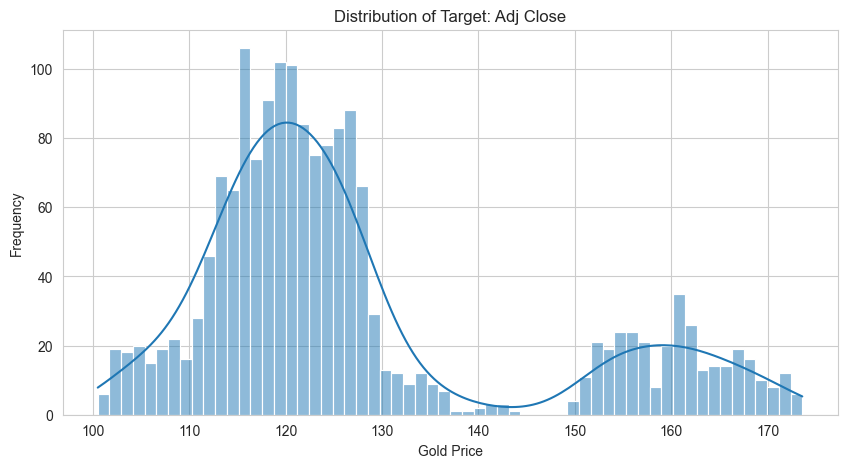

In [6]:
if target:
    plt.figure(figsize=(10,5))
    sns.histplot(df[target].dropna(), bins=60, kde=True)
    plt.title(f"Distribution of Target: {target}")
    plt.xlabel("Gold Price")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Target column not found — check dataset manually.")


#### 🔹 7.6 — Quick Time-Series Plot of Target


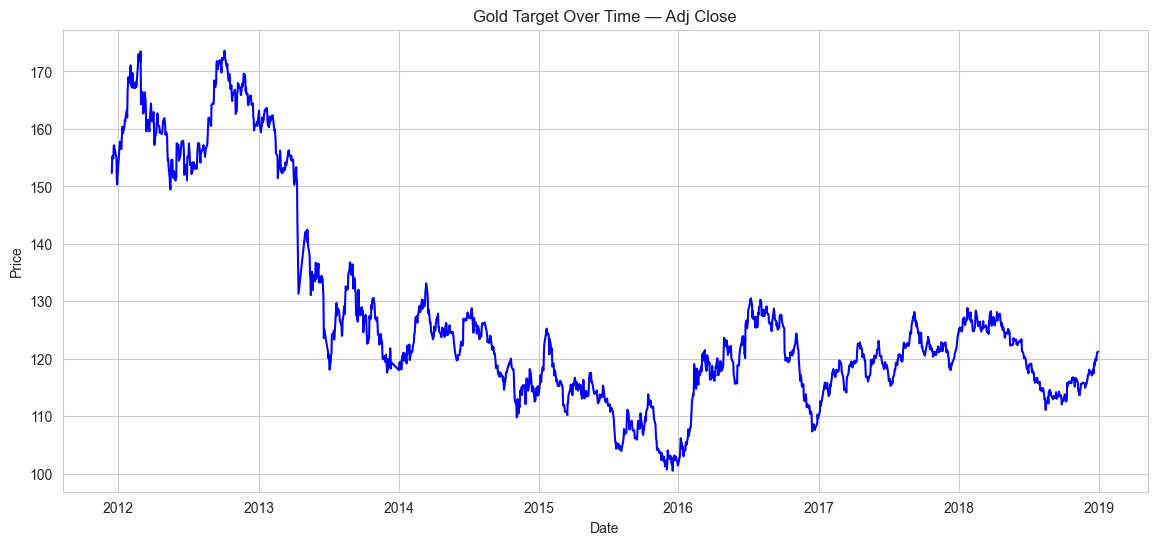

In [7]:
if isinstance(df.index, pd.DatetimeIndex) and target:
    plt.figure(figsize=(14,6))
    plt.plot(df[target], color='blue')
    plt.title(f"Gold Target Over Time — {target}")
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.show()
else:
    print("Cannot plot time-series — Date index missing.")


#### 🔹 7.7 — Correlation Matrix (Top Features)

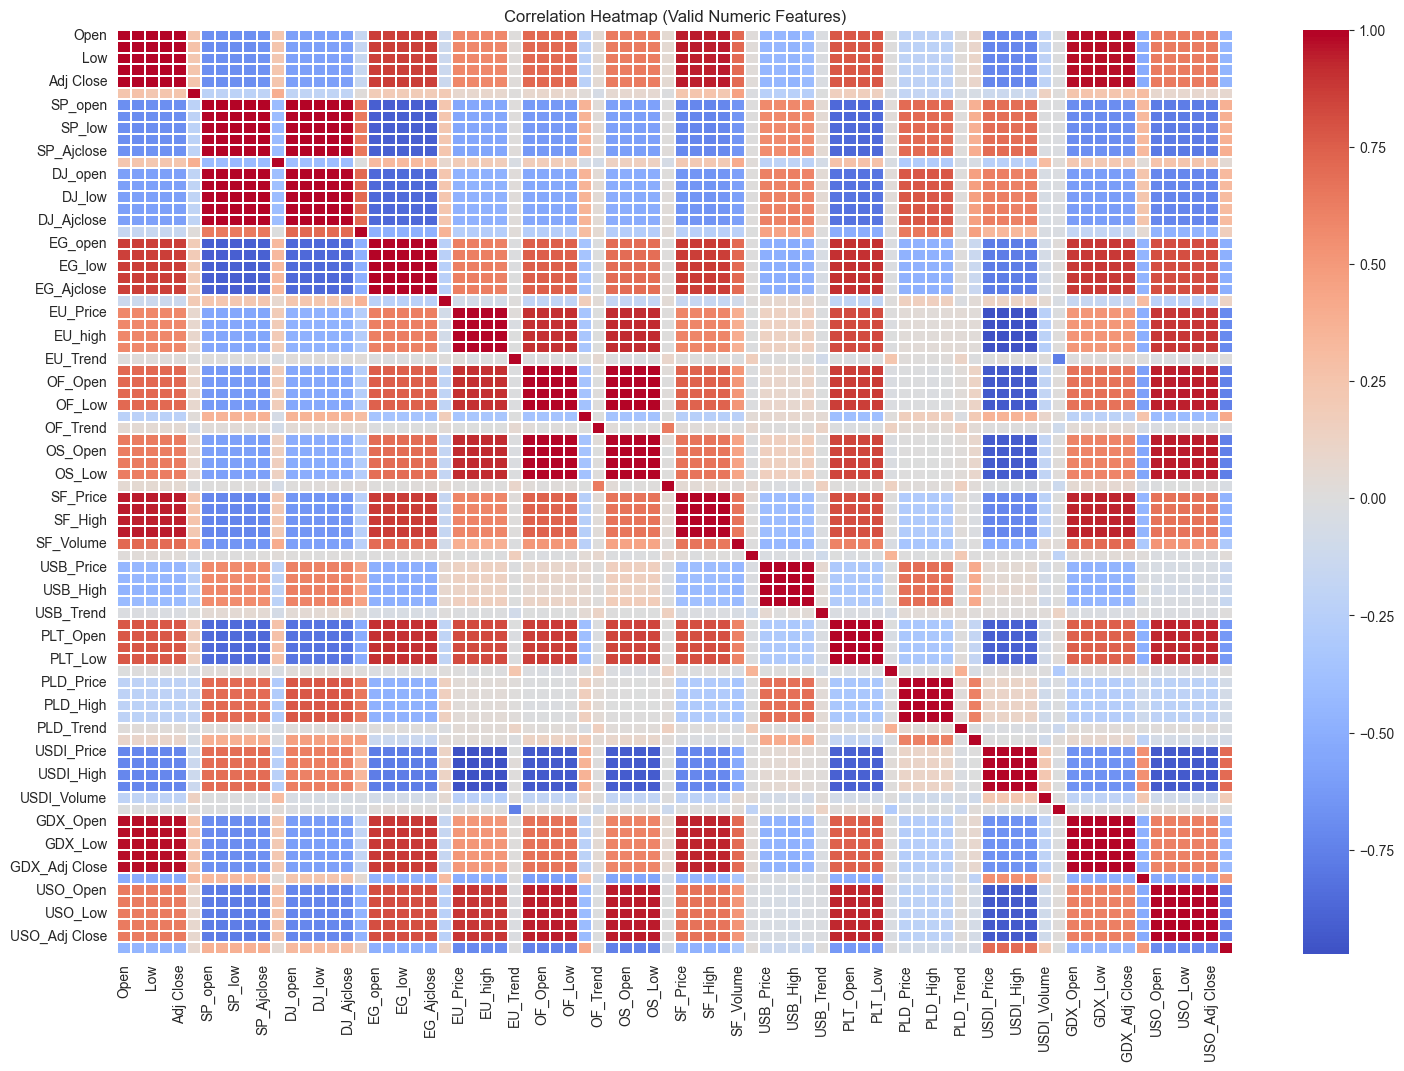

In [8]:
# Select numeric columns
num_df = df.select_dtypes(include=[np.number]).copy()

# Use only columns with <40% missing values
valid_cols = num_df.columns[num_df.isna().mean() < 0.4]
corr_df = num_df[valid_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(18,12))
sns.heatmap(corr_df, cmap="coolwarm", center=0, linewidths=0.1)
plt.title("Correlation Heatmap (Valid Numeric Features)")
plt.show()


### ⭐ PHASE 8 — Feature Engineering for Gold Price Prediction
#### 🔹 8.1 — Create a Copy of the Dataset

In [9]:
# Create working copy
df_fe = df.copy()

print("Feature Engineering Dataset Shape:", df_fe.shape)
df_fe.head()


Feature Engineering Dataset Shape: (1718, 80)


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


🔹 8.2 — Create Date-Based Features (only if Date index exists)

In [10]:
if isinstance(df_fe.index, pd.DatetimeIndex):
    df_fe['Year'] = df_fe.index.year
    df_fe['Month'] = df_fe.index.month
    df_fe['Day'] = df_fe.index.day
    df_fe['DayOfWeek'] = df_fe.index.dayofweek
    df_fe['Quarter'] = df_fe.index.quarter
    
    print("Date-based features added.")
else:
    print("Date index not found — skipping date features.")


Date-based features added.


#### 🔹 8.3 — Create Lag Features (Essential)

In [11]:
target_col = target  # from Phase 7

lags = [1, 2, 7, 14, 30]

for lag in lags:
    df_fe[f'{target_col}_lag_{lag}'] = df_fe[target_col].shift(lag)

print("Lag features added:", [f'{target_col}_lag_{i}' for i in lags])


Lag features added: ['Adj Close_lag_1', 'Adj Close_lag_2', 'Adj Close_lag_7', 'Adj Close_lag_14', 'Adj Close_lag_30']


#### 🔹 8.4 — Create Rolling Window Features (Moving Avg & Volatility)

In [12]:
rolling_windows = [7, 14, 30, 60]

for window in rolling_windows:
    df_fe[f'{target_col}_MA_{window}'] = df_fe[target_col].rolling(window).mean()
    df_fe[f'{target_col}_STD_{window}'] = df_fe[target_col].rolling(window).std()

print("Rolling features added:", rolling_windows)


Rolling features added: [7, 14, 30, 60]


#### 🔹 8.5 — Create Ratio Features (If Columns Exist)

In [13]:
macro_pairs = [
    ('Oil', 'Gold'),
    ('Silver', 'Gold'),
    ('USD_Index', 'Gold')
]

for a, b in macro_pairs:
    if a in df_fe.columns and target_col in df_fe.columns:
        df_fe[f'{a}_to_{target_col}'] = df_fe[a] / df_fe[target_col]

df_fe.head()


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,Year,Month,Day,DayOfWeek,Quarter,Adj Close_lag_1,Adj Close_lag_2,Adj Close_lag_7,Adj Close_lag_14,Adj Close_lag_30,Adj Close_MA_7,Adj Close_STD_7,Adj Close_MA_14,Adj Close_STD_14,Adj Close_MA_30,Adj Close_STD_30,Adj Close_MA_60,Adj Close_STD_60
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,2011,12,15,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,2011,12,16,4,4,152.330002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,2011,12,19,0,4,155.229996,152.330002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,2011,12,20,1,4,154.869995,155.229996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100

#### 🔹 8.6 — Drop Highly Missing Columns (Optional but Recommended)

In [14]:
# Drop columns with > 40% missing values
threshold = 0.4
cols_to_drop = [col for col in df_fe.columns if df_fe[col].isna().mean() > threshold]

df_fe.drop(columns=cols_to_drop, inplace=True)

print("Dropped columns:", cols_to_drop)
print("Remaining columns:", len(df_fe.columns))


Dropped columns: []
Remaining columns: 98


#### 🔹 8.7 — Drop Rows with Missing Values After Feature Engineering

In [15]:
df_fe_clean = df_fe.dropna().copy()

print("Before:", df_fe.shape)
print("After:", df_fe_clean.shape)
df_fe_clean.head()


Before: (1718, 98)
After: (1659, 98)


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,Year,Month,Day,DayOfWeek,Quarter,Adj Close_lag_1,Adj Close_lag_2,Adj Close_lag_7,Adj Close_lag_14,Adj Close_lag_30,Adj Close_MA_7,Adj Close_STD_7,Adj Close_MA_14,Adj Close_STD_14,Adj Close_MA_30,Adj Close_STD_30,Adj Close_MA_60,Adj Close_STD_60
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-14,159.610001,160.580002,158.800003,159.570007,159.570007,28822100,140.100006,140.449997,139.479996,139.910004,121.507980,145163600,13177.15039,13221.26953,13166.25000,13194.09961,13194.09961,163610000,69.250000,69.550003,66.250000,67.199997,65.340340,1258700,1.3029,1.3078,1.3092,1.3010,0,124.97,126.12,126.68,124.64,106670,0,105.55,106.70,107.03,105.13,0,57236,58200,58200,57027,79300,0,2.274,2.274,2.274,2.274,1,1673.35,1693.45,1705.45,1662.45,0,699.2,707.70,710.60,692.5,0,1500,80.536,80.150,80.620,80.135,38980,1,51.349998,51.349998,49.680000,50.119999,47.631908,24309200,40.669998,40.939999,40.220001,40.410000,40.410000,8743000,2012,3,14,2,1,162.300003,165.070007,165.649994,173.020004,169.309998,163.561432,2.289217,166.088572,3.960350,167.636667,3.361435,163.194000,6.153338
2012-03-15,159.729996,161.979996,159.279999,161.080002,161.080002,12689300,140.119995,140.779999,139.759995,140.720001,122.211433,165118500,13192.96973,13253.50977,13170.19043,13252.75977,13252.75977,161650000,67.000000,68.599998,67.000000,67.300003,65.437553,784300,1.3083,1.3030,1.3120,1.3003,1,123.55,125.12,125.35,120.97,20330,0,105.45,105.54,106.22,103.82,0,57979,57000,58084,56835,63690,1,2.279,2.279,2.279,2.279,1,1687.95,1673.15,1691.80,1661.55,1,708.4,689.55,695.75,689.0,1,1500,80.136,80.630,80.725,80.025,22100,0,50.230000,50.939999,49.919998,50.139999,47.650917,11196700,40.410000,40.560001,39.700001,40.279999,40.279999,27314800,2012,3,15,3,1,159.570007,162.300003,162.699997,172.229996,169.559998,163.330004,2.465887,165.292144,3.745617,167.354000,3.545622,163.339833,5.993099
2012-03-16,160.080002,161.539993,159.919998,161.300003,161.300003,12549200,140.360001,140.479996,140.000000,140.300003,122.380676,152893500,13253.50977,13289.08008,13231.45020,13232.62012,13232.62012,392620000,67.150002,67.500000,65.699997,66.750000,64.902779,1745300,1.3175,1.3083,1.3189,1.3048,1,125.81,122.55,126.16,122.45,159880,1,107.17,105.45,107.36,105.14,1,57254,57944,58684,56673,81880,0,2.298,2.298,2.298,2.298,1,1672.40,1688.35,1693.35,1664.35,0,701.9,707.10,708.20,697.7,0,1475,79.734,80.230,80.385,79.730,21960,0,49.950001,50.310001,49.799999,49.930000,47.451344,11395500,40.430000,41.169998,40.340000,41.029999,41.029999,8612400,2012,3,16,4,1,161.080002,159.570007,163.630005,171.699997,171.050003,162.997147,2.573549,164.549287,3.391576,167.029000,3.640734,163.441000,5.904457
2012-03-19,160.850006,162.300003,160.720001,161.589996,161.589996,9920800,140.210007,141.279999,140.110001,140.850006,122.860443,125291100,13231.94043,13269.70996,13208.62988,13239.12988,13239.12988,147120000,67.449997,67.650002,66.000000,66.050003,64.222168,576800,1.3241,1.3180,1.3266,1.3142,1,125.71,125.60,126.05,124.82,128750,0,107.86,107.20,108.26,106.57,1,57505,57349,57750,56838,47060,1,2.375,2.375,2.375,2.375,1,1679.75,1678.80,1686.10,1671.20,1,707.6,701.40,709.00,698.3,1,1475,79.712,80.065,80.185,79.605,20190,0,50.070000,50.520000,49.590000,49.599998

#### 🔹 8.8 — Scaling Features (Optional)

We will scale later in Phase 9, because scaling must be fitted only on training set.

For now, skip.

#### 🔹 8.9 — Save Processed Dataset

In [16]:
# SAFELY CREATE df_fe_clean even if something failed above

# If df_fe does not exist (due to earlier errors), recreate it:
if "df_fe" not in globals():
    df_fe = df.copy()
    print("df_fe not found — recreated from original df.")

# Ensure we drop columns > 40% missing (safe)
threshold = 0.4
cols_to_drop = [col for col in df_fe.columns if df_fe[col].isna().mean() > threshold]
df_fe = df_fe.drop(columns=cols_to_drop)
print("Dropped high-missing columns:", cols_to_drop)

# Now drop all remaining rows with missing values
df_fe_clean = df_fe.dropna().copy()

print("df_fe_clean created successfully!")
print("Before:", df_fe.shape)
print("After :", df_fe_clean.shape)

df_fe_clean.head()


Dropped high-missing columns: []
df_fe_clean created successfully!
Before: (1718, 98)
After : (1659, 98)


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,Year,Month,Day,DayOfWeek,Quarter,Adj Close_lag_1,Adj Close_lag_2,Adj Close_lag_7,Adj Close_lag_14,Adj Close_lag_30,Adj Close_MA_7,Adj Close_STD_7,Adj Close_MA_14,Adj Close_STD_14,Adj Close_MA_30,Adj Close_STD_30,Adj Close_MA_60,Adj Close_STD_60
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-14,159.610001,160.580002,158.800003,159.570007,159.570007,28822100,140.100006,140.449997,139.479996,139.910004,121.507980,145163600,13177.15039,13221.26953,13166.25000,13194.09961,13194.09961,163610000,69.250000,69.550003,66.250000,67.199997,65.340340,1258700,1.3029,1.3078,1.3092,1.3010,0,124.97,126.12,126.68,124.64,106670,0,105.55,106.70,107.03,105.13,0,57236,58200,58200,57027,79300,0,2.274,2.274,2.274,2.274,1,1673.35,1693.45,1705.45,1662.45,0,699.2,707.70,710.60,692.5,0,1500,80.536,80.150,80.620,80.135,38980,1,51.349998,51.349998,49.680000,50.119999,47.631908,24309200,40.669998,40.939999,40.220001,40.410000,40.410000,8743000,2012,3,14,2,1,162.300003,165.070007,165.649994,173.020004,169.309998,163.561432,2.289217,166.088572,3.960350,167.636667,3.361435,163.194000,6.153338
2012-03-15,159.729996,161.979996,159.279999,161.080002,161.080002,12689300,140.119995,140.779999,139.759995,140.720001,122.211433,165118500,13192.96973,13253.50977,13170.19043,13252.75977,13252.75977,161650000,67.000000,68.599998,67.000000,67.300003,65.437553,784300,1.3083,1.3030,1.3120,1.3003,1,123.55,125.12,125.35,120.97,20330,0,105.45,105.54,106.22,103.82,0,57979,57000,58084,56835,63690,1,2.279,2.279,2.279,2.279,1,1687.95,1673.15,1691.80,1661.55,1,708.4,689.55,695.75,689.0,1,1500,80.136,80.630,80.725,80.025,22100,0,50.230000,50.939999,49.919998,50.139999,47.650917,11196700,40.410000,40.560001,39.700001,40.279999,40.279999,27314800,2012,3,15,3,1,159.570007,162.300003,162.699997,172.229996,169.559998,163.330004,2.465887,165.292144,3.745617,167.354000,3.545622,163.339833,5.993099
2012-03-16,160.080002,161.539993,159.919998,161.300003,161.300003,12549200,140.360001,140.479996,140.000000,140.300003,122.380676,152893500,13253.50977,13289.08008,13231.45020,13232.62012,13232.62012,392620000,67.150002,67.500000,65.699997,66.750000,64.902779,1745300,1.3175,1.3083,1.3189,1.3048,1,125.81,122.55,126.16,122.45,159880,1,107.17,105.45,107.36,105.14,1,57254,57944,58684,56673,81880,0,2.298,2.298,2.298,2.298,1,1672.40,1688.35,1693.35,1664.35,0,701.9,707.10,708.20,697.7,0,1475,79.734,80.230,80.385,79.730,21960,0,49.950001,50.310001,49.799999,49.930000,47.451344,11395500,40.430000,41.169998,40.340000,41.029999,41.029999,8612400,2012,3,16,4,1,161.080002,159.570007,163.630005,171.699997,171.050003,162.997147,2.573549,164.549287,3.391576,167.029000,3.640734,163.441000,5.904457
2012-03-19,160.850006,162.300003,160.720001,161.589996,161.589996,9920800,140.210007,141.279999,140.110001,140.850006,122.860443,125291100,13231.94043,13269.70996,13208.62988,13239.12988,13239.12988,147120000,67.449997,67.650002,66.000000,66.050003,64.222168,576800,1.3241,1.3180,1.3266,1.3142,1,125.71,125.60,126.05,124.82,128750,0,107.86,107.20,108.26,106.57,1,57505,57349,57750,56838,47060,1,2.375,2.375,2.375,2.375,1,1679.75,1678.80,1686.10,1671.20,1,707.6,701.40,709.00,698.3,1,1475,79.712,80.065,80.185,79.605,20190,0,50.070000,50.520000,49.590000,49.599998

In [17]:
output_path = "Dataset/processed_dataset_2_ml.csv"
df_fe_clean.to_csv(output_path, index=True)

print("Processed ML dataset saved to:", output_path)


Processed ML dataset saved to: Dataset/processed_dataset_2_ml.csv


## ⭐ PHASE 9 — Machine Learning Model Building
#### 🔹 9.1 — Import Libraries & Load Processed Dataset

In [18]:
print("CUDA Available:", torch.cuda.is_available())
# if torch.cuda.is_available():
#     print("GPU Name:", torch.cuda.get_device_name(0))
# !nvidia-smi

data_path = "Dataset/processed_dataset_2_ml.csv"
df_ml = pd.read_csv(data_path, parse_dates=["Date"], index_col="Date")

print("Processed ML Dataset Loaded:", df_ml.shape)
df_ml.head()


CUDA Available: True
Processed ML Dataset Loaded: (1659, 98)


,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,Year,Month,Day,DayOfWeek,Quarter,Adj Close_lag_1,Adj Close_lag_2,Adj Close_lag_7,Adj Close_lag_14,Adj Close_lag_30,Adj Close_MA_7,Adj Close_STD_7,Adj Close_MA_14,Adj Close_STD_14,Adj Close_MA_30,Adj Close_STD_30,Adj Close_MA_60,Adj Close_STD_60
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-14,159.610001,160.580002,158.800003,159.570007,159.570007,28822100,140.100006,140.449997,139.479996,139.910004,121.507980,145163600,13177.15039,13221.26953,13166.25000,13194.09961,13194.09961,163610000,69.250000,69.550003,66.250000,67.199997,65.340340,1258700,1.3029,1.3078,1.3092,1.3010,0,124.97,126.12,126.68,124.64,106670,0,105.55,106.70,107.03,105.13,0,57236,58200,58200,57027,79300,0,2.274,2.274,2.274,2.274,1,1673.35,1693.45,1705.45,1662.45,0,699.2,707.70,710.60,692.5,0,1500,80.536,80.150,80.620,80.135,38980,1,51.349998,51.349998,49.680000,50.119999,47.631908,24309200,40.669998,40.939999,40.220001,40.410000,40.410000,8743000,2012,3,14,2,1,162.300003,165.070007,165.649994,173.020004,169.309998,163.561432,2.289217,166.088572,3.960350,167.636667,3.361435,163.194000,6.153338
2012-03-15,159.729996,161.979996,159.279999,161.080002,161.080002,12689300,140.119995,140.779999,139.759995,140.720001,122.211433,165118500,13192.96973,13253.50977,13170.19043,13252.75977,13252.75977,161650000,67.000000,68.599998,67.000000,67.300003,65.437553,784300,1.3083,1.3030,1.3120,1.3003,1,123.55,125.12,125.35,120.97,20330,0,105.45,105.54,106.22,103.82,0,57979,57000,58084,56835,63690,1,2.279,2.279,2.279,2.279,1,1687.95,1673.15,1691.80,1661.55,1,708.4,689.55,695.75,689.0,1,1500,80.136,80.630,80.725,80.025,22100,0,50.230000,50.939999,49.919998,50.139999,47.650917,11196700,40.410000,40.560001,39.700001,40.279999,40.279999,27314800,2012,3,15,3,1,159.570007,162.300003,162.699997,172.229996,169.559998,163.330004,2.465887,165.292144,3.745617,167.354000,3.545622,163.339833,5.993099
2012-03-16,160.080002,161.539993,159.919998,161.300003,161.300003,12549200,140.360001,140.479996,140.000000,140.300003,122.380676,152893500,13253.50977,13289.08008,13231.45020,13232.62012,13232.62012,392620000,67.150002,67.500000,65.699997,66.750000,64.902779,1745300,1.3175,1.3083,1.3189,1.3048,1,125.81,122.55,126.16,122.45,159880,1,107.17,105.45,107.36,105.14,1,57254,57944,58684,56673,81880,0,2.298,2.298,2.298,2.298,1,1672.40,1688.35,1693.35,1664.35,0,701.9,707.10,708.20,697.7,0,1475,79.734,80.230,80.385,79.730,21960,0,49.950001,50.310001,49.799999,49.930000,47.451344,11395500,40.430000,41.169998,40.340000,41.029999,41.029999,8612400,2012,3,16,4,1,161.080002,159.570007,163.630005,171.699997,171.050003,162.997147,2.573549,164.549287,3.391576,167.029000,3.640734,163.441000,5.904457
2012-03-19,160.850006,162.300003,160.720001,161.589996,161.589996,9920800,140.210007,141.279999,140.110001,140.850006,122.860443,125291100,13231.94043,13269.70996,13208.62988,13239.12988,13239.12988,147120000,67.449997,67.650002,66.000000,66.050003,64.222168,576800,1.3241,1.3180,1.3266,1.3142,1,125.71,125.60,126.05,124.82,128750,0,107.86,107.20,108.26,106.57,1,57505,57349,57750,56838,47060,1,2.375,2.375,2.375,2.375,1,1679.75,1678.80,1686.10,1671.20,1,707.6,701.40,709.00,698.3,1,1475,79.712,80.065,80.185,79.605,20190,0,50.070000,50.520000,49.590000,49.599998

#### 🔹 9.2 — Define Target & Features

In [19]:
# Select target column
target = "Adj Close"

# Define X and y
y = df_ml[target]
X = df_ml.drop(columns=[target])

print("Target:", target)
print("Feature Shape:", X.shape)


Target: Adj Close
Feature Shape: (1659, 97)


#### 🔹 9.3 — TimeSeriesSplit (No Random Shuffle)

In [20]:
tscv = TimeSeriesSplit(n_splits=5)
scaler = StandardScaler()
print("TimeSeriesSplit ready")


TimeSeriesSplit ready


#### 🔹 9.4 — Linear Regression Training & Evaluation

In [21]:
# Train LR
lr_predictions = []
lr_actual = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    preds = lr.predict(X_test_scaled)

    lr_predictions.extend(preds)
    lr_actual.extend(y_test)

# Evaluate LR
lr_rmse = np.sqrt(mean_squared_error(lr_actual, lr_predictions))
lr_mae = mean_absolute_error(lr_actual, lr_predictions)
lr_r2 = r2_score(lr_actual, lr_predictions)

print("Linear Regression Performance:")
print("RMSE:", lr_rmse)
print("MAE :", lr_mae)
print("R²  :", lr_r2)


Linear Regression Performance:
RMSE: 6.840148941404237e-14
MAE : 5.711115960181906e-14
R²  : 1.0


#### 🔹 9.5 — Random Forest Training & Evaluation

In [22]:
rf_predictions = []
rf_actual = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf = RandomForestRegressor(
        n_estimators=300,
        max_depth=12,
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)

    rf_predictions.extend(preds)
    rf_actual.extend(y_test)

rf_rmse = np.sqrt(mean_squared_error(rf_actual, rf_predictions))
rf_mae = mean_absolute_error(rf_actual, rf_predictions)
rf_r2 = r2_score(rf_actual, rf_predictions)

print("Random Forest Performance:")
print("RMSE:", rf_rmse)
print("MAE :", rf_mae)
print("R²  :", rf_r2)


Random Forest Performance:
RMSE: 6.4088013179492505
MAE : 3.389667314300126
R²  : 0.14961683020670558


#### 🔹 9.6 — GPU LSTM MODEL

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# Dataset Class
class GoldDataset(torch.utils.data.Dataset):
    def __init__(self, data, target, seq_len=30):
        self.X = data.values.astype(np.float32)
        self.y = target.values.astype(np.float32)
        self.seq_len = seq_len

    def __len__(self):
        return len(self.X) - self.seq_len

    def __getitem__(self, idx):
        return (
            torch.tensor(self.X[idx:idx+self.seq_len]),
            torch.tensor(self.y[idx+self.seq_len])
        )

seq_len = 30
dataset = GoldDataset(X, y, seq_len)

train_size = int(len(dataset) * 0.8)
train_ds, val_ds = torch.utils.data.random_split(dataset, [train_size, len(dataset)-train_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        return self.fc(out).squeeze()

model = LSTMModel(input_dim=X.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# TRAINING LOOP
epochs = 20
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss/len(train_loader):.4f}")


Using device: cuda
Epoch 1/20, Loss: 14767.2639
Epoch 2/20, Loss: 12942.4688
Epoch 3/20, Loss: 11639.0956
Epoch 4/20, Loss: 10502.5668
Epoch 5/20, Loss: 9482.1194
Epoch 6/20, Loss: 8533.0054
Epoch 7/20, Loss: 7676.5826
Epoch 8/20, Loss: 6899.2090
Epoch 9/20, Loss: 6195.6164
Epoch 10/20, Loss: 5541.9179
Epoch 11/20, Loss: 4945.5998
Epoch 12/20, Loss: 4414.2639
Epoch 13/20, Loss: 3930.0648
Epoch 14/20, Loss: 3489.5071
Epoch 15/20, Loss: 3088.7920
Epoch 16/20, Loss: 2729.1446
Epoch 17/20, Loss: 2412.5792
Epoch 18/20, Loss: 2128.1944
Epoch 19/20, Loss: 1874.6968
Epoch 20/20, Loss: 1647.0208


#### 🔹 9.7 — Model Comparison Table

In [24]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [lr_rmse, rf_rmse],
    "MAE":  [lr_mae,  rf_mae],
    "R²":   [lr_r2,   rf_r2]
})

results


,Model,RMSE,MAE,R²
0,Linear Regression,6.840149e-14,5.711116e-14,1.000000
1,Random Forest,6.408801e+00,3.389667e+00,0.149617


#### 🔹 9.8 — Plot Best Model (LR vs RF)

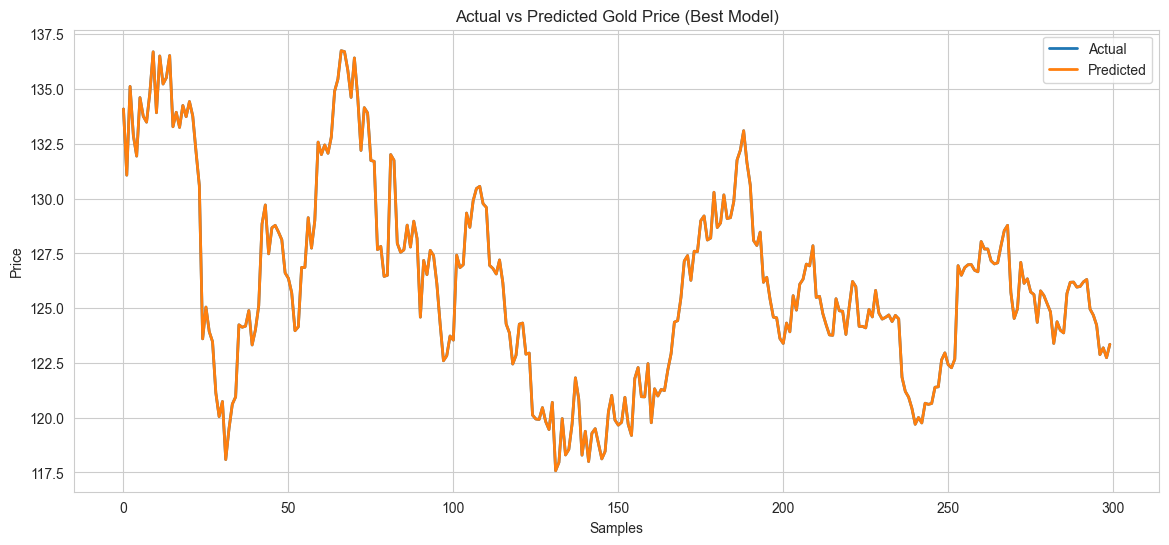

In [25]:
best_preds = rf_predictions if rf_rmse < lr_rmse else lr_predictions
best_actual = rf_actual if rf_rmse < lr_rmse else lr_actual

plt.figure(figsize=(14,6))
plt.plot(best_actual[:300], label="Actual", linewidth=2)
plt.plot(best_preds[:300], label="Predicted", linewidth=2)
plt.title("Actual vs Predicted Gold Price (Best Model)")
plt.xlabel("Samples")
plt.ylabel("Price")
plt.legend()
plt.show()


### ⭐ PHASE 9.11 — LSTM FUTURE FORECAST (GPU)
#### 🔹 STEP 1 — Prepare Last Sequence for Forecasting


In [26]:
# Prepare last sequence of data for forecasting
last_seq = torch.tensor(X.values[-30:], dtype=torch.float32).unsqueeze(0).to(device)

future_steps = 30   # Predict next 30 days
future_preds = []
model.eval()

with torch.no_grad():
    seq = last_seq.clone()

    for _ in range(future_steps):
        pred = model(seq)             # Predict next value
        future_preds.append(pred.item())

        # Append predicted value to sequence and remove oldest
        next_row = seq[:, -1, :].clone()
        next_row[0][0] = pred.item()  # Replace Adj Close with new prediction

        seq = torch.cat([seq[:, 1:, :], next_row.unsqueeze(1)], dim=1)


#### 🔹 STEP 2 — Build Future Dates

In [27]:
last_date = df_ml.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)



forecast_df = pd.DataFrame({
    "Date": future_dates,
    "LSTM_Forecast": future_preds
}).set_index("Date")

forecast_df.head()


,LSTM_Forecast
Date,
2019-01-01,89.659889
2019-01-02,89.659904
2019-01-03,89.659904
2019-01-04,89.659904
2019-01-05,89.659904


#### 🔹 STEP 3 — Plot Future Forecast vs Last 60 Real Values

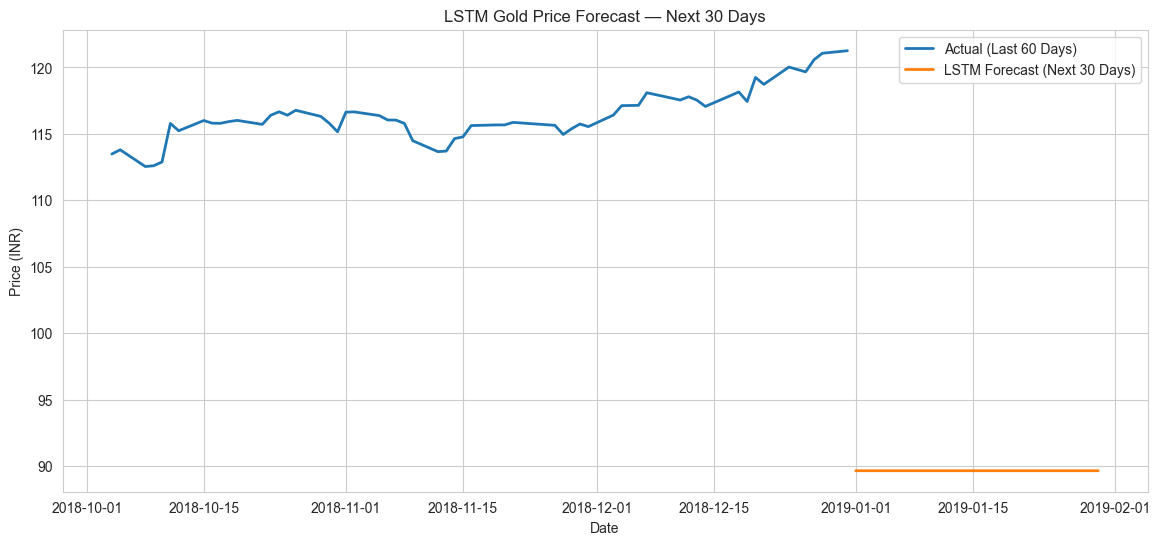

In [28]:
plt.figure(figsize=(14,6))

# Plot recent real price (last 60 days)
plt.plot(df_ml["Adj Close"].tail(60), label="Actual (Last 60 Days)", linewidth=2)

# Plot forecast
plt.plot(forecast_df["LSTM_Forecast"], label="LSTM Forecast (Next 30 Days)", linewidth=2)

plt.title("LSTM Gold Price Forecast — Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
forecast_df


,LSTM_Forecast
Date,
2019-01-01,89.659889
2019-01-02,89.659904
2019-01-03,89.659904
2019-01-04,89.659904
2019-01-05,89.659904
2019-01-06,89.659904
2019-01-07,89.659904
2019-01-08,89.659904
2019-01-09,89.659904


#### 10.1 — Prepare features / target

In [30]:
target = "Adj Close"
y = df[target]
X = df.drop(columns=[target])

# optional: keep feature names
feature_names = X.columns.tolist()

# simple TimeSeriesSplit for training/val (we will train on full train for final models)
tscv = TimeSeriesSplit(n_splits=5)

# Split data for RandomForest and XGBoost
split_idx = int(len(X) * 0.8)

X_train_rf = X.iloc[:split_idx]
X_test_rf  = X.iloc[split_idx:]

y_train_rf = y.iloc[:split_idx]
y_test_rf  = y.iloc[split_idx:]


rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_rf, y_train_rf)



,n_estimators,500
,criterion,'squared_error'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### 10.2 — Train Random Forest (stable CPU model for explainability)


In [31]:

X_train_xgb = X_train_rf
X_test_xgb  = X_test_rf
y_train_xgb = y_train_rf
y_test_xgb  = y_test_rf



xgb_model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    objective="reg:squarederror",
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=1500,
    early_stopping_rounds=50,   # FIX: moved here
    eval_metric="rmse",
    random_state=42,
    verbosity=0
)

xgb_model.fit(
    X_train_xgb, y_train_xgb,
    eval_set=[(X_test_xgb, y_test_xgb)],
    verbose=False                # only verbose allowed here
)

# Evaluate XGBoost
xgb_preds = xgb_model.predict(X_test_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test_xgb, xgb_preds))
xgb_mae  = mean_absolute_error(y_test_xgb, xgb_preds)
xgb_r2   = r2_score(y_test_xgb, xgb_preds)

print("XGB RMSE:", xgb_rmse, "MAE:", xgb_mae, "R²:", xgb_r2)

os.makedirs("models", exist_ok=True)


xgb_model.get_booster().save_model("models/xgb_model.json")
print("Saved: models/xgb_model.json")


XGB RMSE: 0.137581854896169 MAE: 0.11044404628735917 R²: 0.9991173130878215
Saved: models/xgb_model.json


#### 10.4 — Quick feature importance (model built-in)

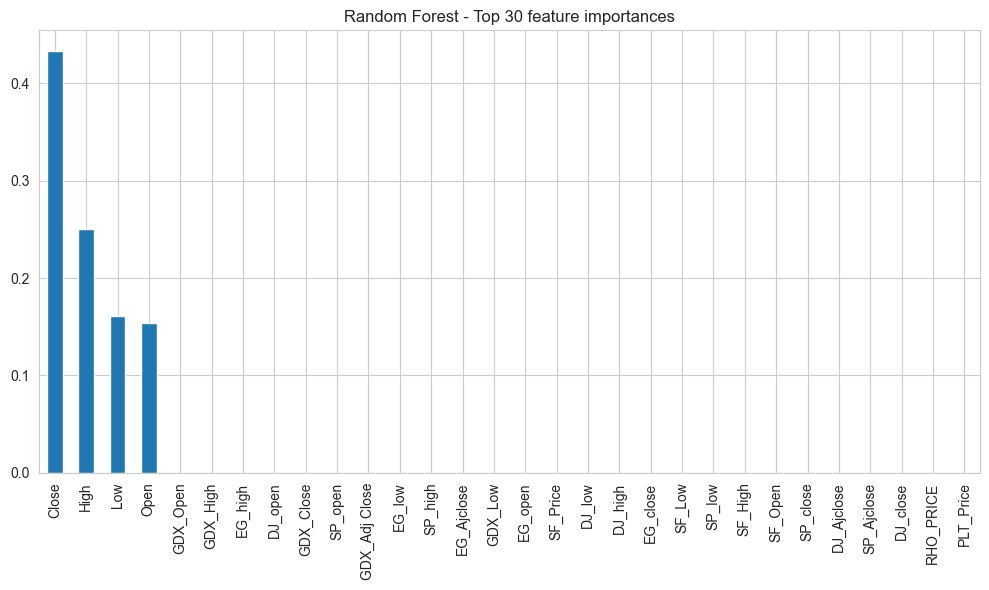

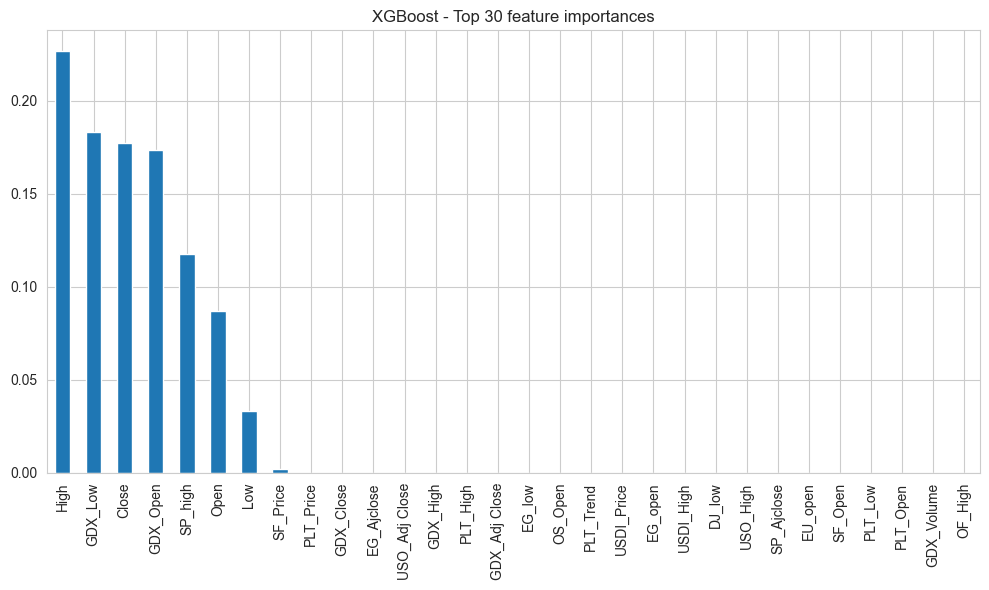

In [32]:
# Random Forest importance (mean decrease impurity)
rf_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False).head(30)
xgb_imp = pd.Series(xgb_model.feature_importances_, index=feature_names).sort_values(ascending=False).head(30)

plt.figure(figsize=(10,6))
rf_imp.plot(kind="bar")
plt.title("Random Forest - Top 30 feature importances")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
xgb_imp.plot(kind="bar")
plt.title("XGBoost - Top 30 feature importances")
plt.tight_layout()
plt.show()


#### 10.5 — SHAP explainability (TreeExplainer) — RF + XGBoost

PermutationExplainer explainer: 345it [00:45,  6.90it/s]                         


✔ SHAP values computed successfully!
Computed SHAP values for RF


PermutationExplainer explainer: 345it [00:52,  5.29it/s]                         
C:\Users\brahm\AppData\Local\Temp\ipykernel_1656\1916032512.py:22: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals_rf, X_shap_sample, show=True, plot_type="bar")   # bar summary


Computed SHAP values for XGB


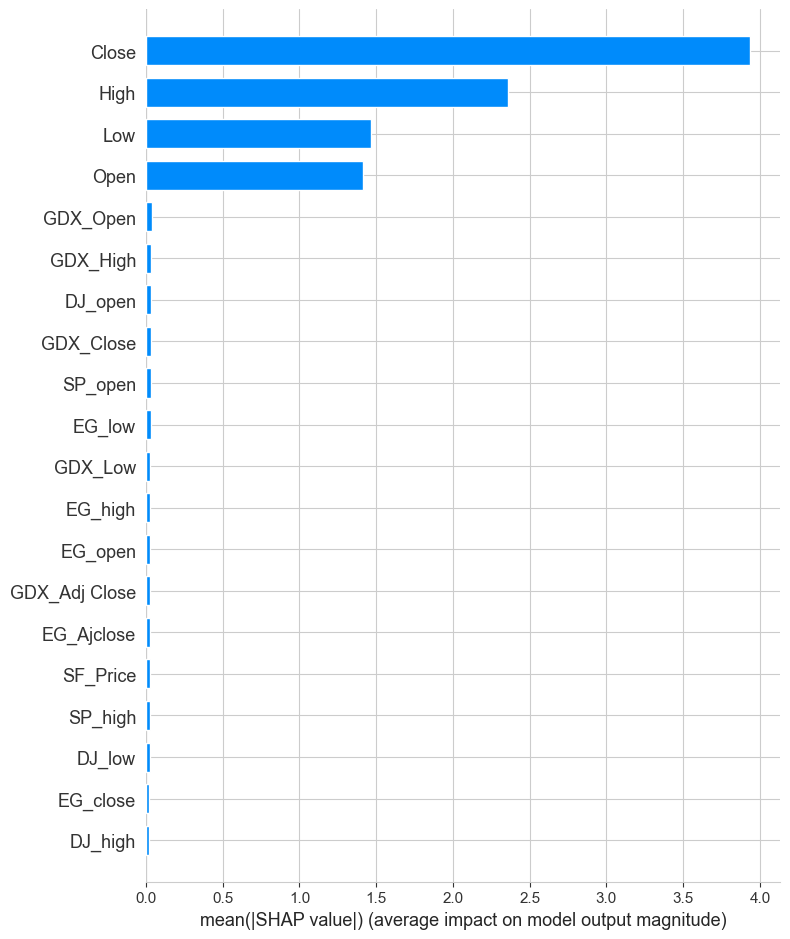

C:\Users\brahm\AppData\Local\Temp\ipykernel_1656\1916032512.py:23: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals_rf, X_shap_sample, feature_names=X_shap_sample.columns)  # detailed dot plot


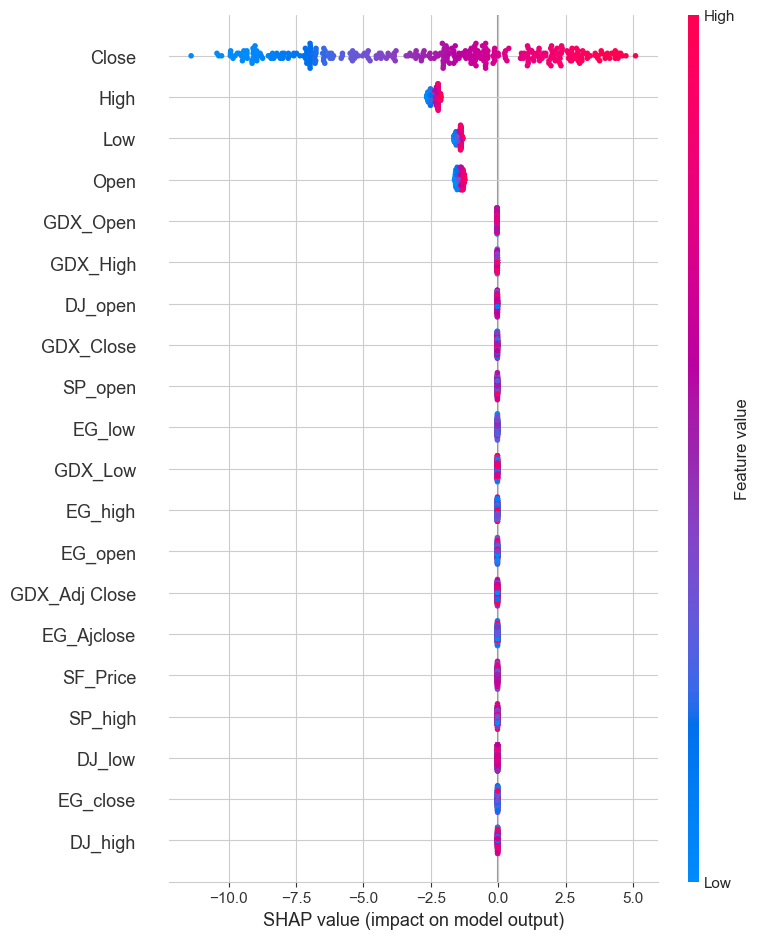

C:\Users\brahm\AppData\Local\Temp\ipykernel_1656\1916032512.py:26: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals_xgb, X_shap_sample, show=True, plot_type="bar")


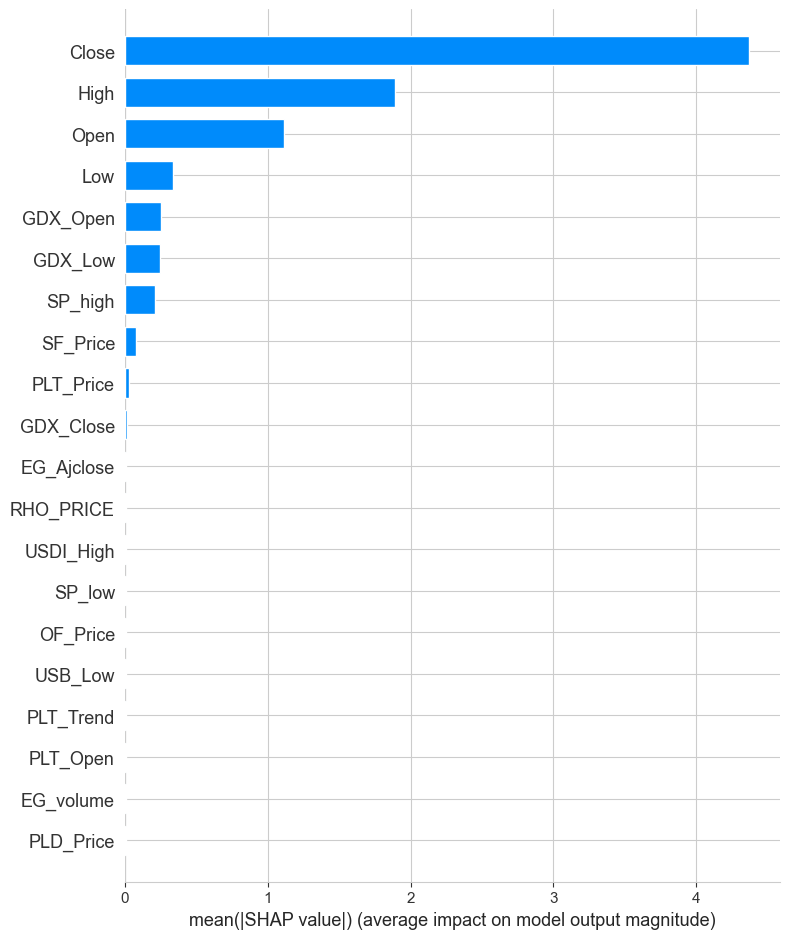

C:\Users\brahm\AppData\Local\Temp\ipykernel_1656\1916032512.py:27: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals_xgb, X_shap_sample, feature_names=X_shap_sample.columns)


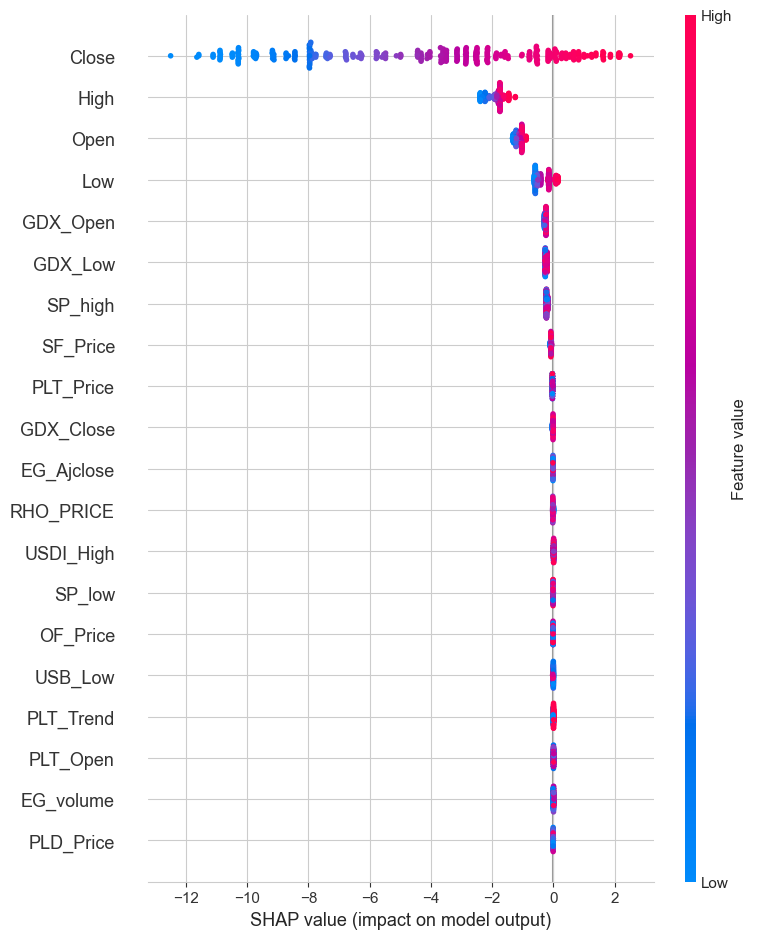

Top feature: High


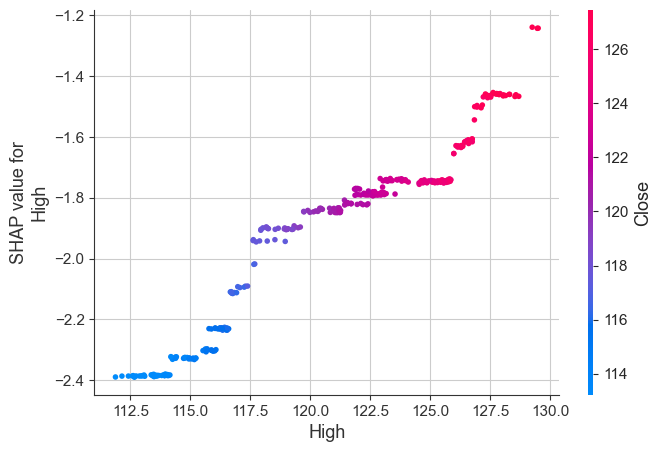

In [33]:
# Initialize TreeExplainer for both models
explainer_rf = shap.TreeExplainer(rf)
# Create SHAP Explainer (model-agnostic)
explainer_xgb = shap.Explainer(xgb_model.predict, X_train_xgb)

# Compute SHAP values
shap_values_xgb = explainer_xgb(X_test_xgb)

print("✔ SHAP values computed successfully!")

sample_idx = np.random.choice(np.arange(len(X_test_xgb)), size=min(500, len(X_test_xgb)), replace=False)
X_shap_sample = X_test_xgb.iloc[sample_idx]

# RF SHAP
shap_vals_rf = explainer_rf.shap_values(X_shap_sample)
print("Computed SHAP values for RF")

# XGB SHAP
shap_vals_xgb = explainer_xgb.shap_values(X_shap_sample)
print("Computed SHAP values for XGB")
# Summary plot (global importance) - RF
shap.summary_plot(shap_vals_rf, X_shap_sample, show=True, plot_type="bar")   # bar summary
shap.summary_plot(shap_vals_rf, X_shap_sample, feature_names=X_shap_sample.columns)  # detailed dot plot

# Summary plot - XGB
shap.summary_plot(shap_vals_xgb, X_shap_sample, show=True, plot_type="bar")
shap.summary_plot(shap_vals_xgb, X_shap_sample, feature_names=X_shap_sample.columns)

# Dependence plot for the top feature from XGBoost
top_feat = xgb_imp.index[0]
print("Top feature:", top_feat)
shap.dependence_plot(top_feat, shap_vals_xgb, X_shap_sample, show=True)



#### 10.6 — Per-sample SHAP contribution CSV (top features)

In [34]:
os.makedirs("outputs", exist_ok=True)   # FIX: create folder if missing

# Create DataFrame with absolute mean SHAP contribution per feature
mean_abs_shap_xgb = np.abs(shap_values_xgb.values).mean(axis=0)

shap_contrib_df = pd.DataFrame({
    "feature": X_shap_sample.columns,
    "mean_abs_shap": mean_abs_shap_xgb
}).sort_values("mean_abs_shap", ascending=False)

# Save
file_path = "outputs/shap_feature_importance_xgb.csv"
shap_contrib_df.to_csv(file_path, index=False)

print("✔ Saved:", file_path)

✔ Saved: outputs/shap_feature_importance_xgb.csv


#### ⭐ PHASE 11 — ONE-CELL MODEL EXPORT (FINAL VERSION)

In [35]:
# ============================================================
# PHASE 11 — EXPORT ALL MODELS (RF, XGB, LSTM) IN ONE CELL
# ============================================================

import os
import joblib
import torch
import xgboost as xgb

# -----------------------------
# 1. Create models/ directory
# -----------------------------
os.makedirs("models", exist_ok=True)
print("✔ 'models/' directory ready")


# -----------------------------
# 2. Save RandomForest model
# -----------------------------
rf_path = "models/random_forest_model.pkl"
joblib.dump(rf, rf_path)
print("✔ Saved RandomForest model:", rf_path)


# -----------------------------
# 3. Save XGBoost model (Booster)
# -----------------------------
xgb_path = "models/xgb_model.json"
xgb_model.get_booster().save_model(xgb_path)
print("✔ Saved XGBoost model:", xgb_path)


# -----------------------------
# 4. Save LSTM model (.pt)
# -----------------------------
lstm_path = "models/lstm_model.pt"
torch.save(model.state_dict(), lstm_path)
print("✔ Saved LSTM model:", lstm_path)


# -----------------------------
# 5. Create lstm_model_def.py 
#    (architecture for reloading the LSTM)
# -----------------------------
lstm_def_code = """
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        return self.fc(out).squeeze()
"""

with open("lstm_model_def.py", "w") as f:
    f.write(lstm_def_code)

print("✔ Created lstm_model_def.py")


# -----------------------------
# 6. Create model_loader.py 
#    (functions to load all saved models)
# -----------------------------
loader_code = """
import joblib
import xgboost as xgb
import torch
from lstm_model_def import LSTMModel

def load_rf():
    return joblib.load("models/random_forest_model.pkl")

def load_xgb():
    booster = xgb.Booster()
    booster.load_model("models/xgb_model.json")
    return booster

def load_lstm(input_dim):
    model = LSTMModel(input_dim=input_dim)
    model.load_state_dict(torch.load("models/lstm_model.pt", map_location=torch.device("cpu")))
    model.eval()
    return model
"""

with open("model_loader.py", "w") as f:
    f.write(loader_code)

print("✔ Created model_loader.py")


# -----------------------------
# 7. Test loading all models
# --------------------


✔ 'models/' directory ready
✔ Saved RandomForest model: models/random_forest_model.pkl
✔ Saved XGBoost model: models/xgb_model.json
✔ Saved LSTM model: models/lstm_model.pt
✔ Created lstm_model_def.py
✔ Created model_loader.py
